In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import contextily as ctx
import folium
from folium.features import DivIcon
from IPython.display import display


In [72]:
# Read the Dataset and get the first 5 rows
df = pd.read_csv('c:/Users/pd63899/Downloads/TRN_RD_TRAFFICCOUNT_TVW_PV_6982498275562085494.csv')
df.head()

,MI_PRINX,SL Number,Site ID,Street Location,Between Street 1,Between Street 2,Direction Bound,Start Date,End Date,Count Year,...,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Data Collected By,Longitude,Latitude,x,y
0,192,18,HAM_HRD_KRL_90,Hampden Road,Hardy Rd,Karella St,Northbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
1,193,19,HAM_HRD_KRL_91,Hampden Road,Hardy Rd,Karella St,Southbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
2,194,82,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Northbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
3,195,83,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Southbound,3/9/2022 12:00:00 AM,3/16/2022 12:00:00 AM,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
4,196,5,ALTRLN_HARDY_KARELA,Altair Lane,Hardy Road,Karella Street,Southbound/Northbound,2/20/2023 12:00:00 AM,2/27/2023 12:00:00 AM,2023,...,9,0.0,50,23.04,0.000,COP,115.813988,-31.972273,1.289236e+07,-3.759670e+06


In [73]:
# Get the statistical information
df.describe()

,MI_PRINX,SL Number,Count Year,Ave Weekday Traffic,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Longitude,Latitude,x,y
count,191.0000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02
mean,287.0000,48.471204,2022.534031,4079.240838,3781.518325,347.544503,372.439791,2.702010,48.848168,45.286848,11.836511,115.850124,-31.959019,1.289638e+07,-3.757919e+06
std,55.2811,28.020067,0.500152,3017.006115,2841.902917,268.931212,306.427007,4.274889,7.450396,10.780276,17.626956,0.020658,0.011344,2.296601e+03,1.494534e+03
min,192.0000,1.000000,2022.000000,17.000000,16.000000,2.000000,2.000000,0.000000,40.000000,18.180000,0.000000,115.813439,-31.988088,1.289229e+07,-3.761745e+06
25%,239.5000,24.500000,2022.000000,2200.500000,1972.500000,169.500000,182.000000,0.123400,40.000000,39.780000,0.185750,115.838285,-31.963013,1.289506e+07,-3.758455e+06
50%,287.0000,48.000000,2023.000000,3505.000000,3242.000000,305.000000,325.000000,0.500000,50.000000,45.180000,3.770000,115.857290,-31.955300,1.289718e+07,-3.757428e+06
75%,334.5000,72.000000,2023.000000,5404.000000,4789.000000,438.000000,461.000000,3.700000,50.000000,51.750000,16.720000,115.864729,-31.952027,1.289800e+07,-3.757001e+06
max,382.0000,102.000000,2023.000000,17246.000000,16037.000000,1730.000000,2667.000000,24.400000,70.000000,67.960000,87.330000,115.880141,-31.943766,1.289972e+07,-3.755930e+06


In [74]:
# Check null value
df.isnull().sum()

MI_PRINX                      0
SL Number                     0
Site ID                       0
Street Location               0
Between Street 1              0
Between Street 2              0
Direction Bound               0
Start Date                    0
End Date                      0
Count Year                    0
Ave Weekday Traffic           0
ADT                           0
AM Peak 8 To 9                0
PM Peak 5 To 6                0
Percent Heavy Vehicles        0
Speed Limit                   0
Percentile 85th               0
Percent Exceed Speed Limit    0
Data Collected By             0
Longitude                     0
Latitude                      0
x                             0
y                             0
dtype: int64

In [75]:
# Convert date and time to pandas date/time format
df['Start Date']=pd.to_datetime(df['Start Date'])
df['End Date']=pd.to_datetime(df['End Date'])
df.head()

C:\Users\pd63899\AppData\Local\Temp\ipykernel_77656\2399509960.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Date']=pd.to_datetime(df['Start Date'])
C:\Users\pd63899\AppData\Local\Temp\ipykernel_77656\2399509960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['End Date']=pd.to_datetime(df['End Date'])


,MI_PRINX,SL Number,Site ID,Street Location,Between Street 1,Between Street 2,Direction Bound,Start Date,End Date,Count Year,...,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Data Collected By,Longitude,Latitude,x,y
0,192,18,HAM_HRD_KRL_90,Hampden Road,Hardy Rd,Karella St,Northbound,2022-03-09,2022-03-16,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
1,193,19,HAM_HRD_KRL_91,Hampden Road,Hardy Rd,Karella St,Southbound,2022-03-09,2022-03-16,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
2,194,82,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Northbound,2022-03-09,2022-03-16,2022,...,245,12.2,50,40.32,1.038,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
3,195,83,HAMPDN_HARDY_KARELA,Hampden Road,Hardy Rd,Karella St,Southbound,2022-03-09,2022-03-16,2022,...,252,14.4,50,37.98,0.461,COP,115.813439,-31.972883,1.289229e+07,-3.759750e+06
4,196,5,ALTRLN_HARDY_KARELA,Altair Lane,Hardy Road,Karella Street,Southbound/Northbound,2023-02-20,2023-02-27,2023,...,9,0.0,50,23.04,0.000,COP,115.813988,-31.972273,1.289236e+07,-3.759670e+06


In [76]:
# Check column names
df.columns

Index(['MI_PRINX', 'SL Number', 'Site ID', 'Street Location',
       'Between Street 1', 'Between Street 2', 'Direction Bound', 'Start Date',
       'End Date', 'Count Year', 'Ave Weekday Traffic', 'ADT',
       'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles',
       'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit',
       'Data Collected By', 'Longitude', 'Latitude', 'x', 'y'],
      dtype='object')

# Visualize data

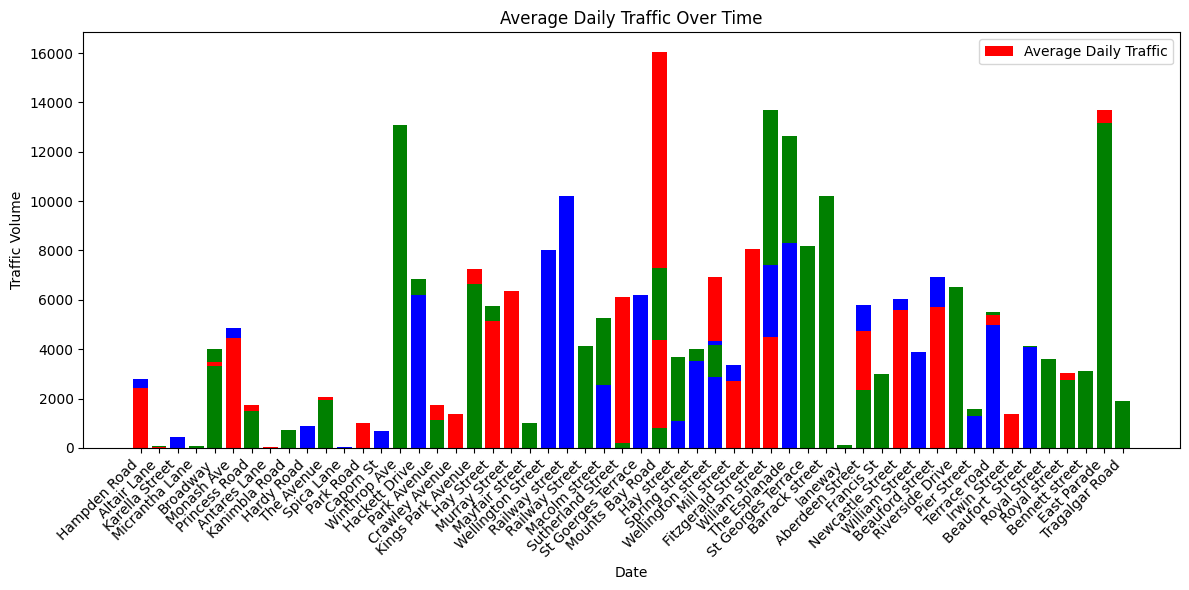

In [77]:
# Plot the the Average daily traffic(ADT) and their street locations
plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue'] # List of colors for the bar 
plt.bar(df['Street Location'], df['ADT'], color=colors, label='Average Daily Traffic')
#plt.plot(df['Street Location'], df['ADT'], color=colors, label='Average Monthly Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
# Make the x-axis label more visible
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.tight_layout() # Adjust layout to make room for the rotated labels
plt.show()

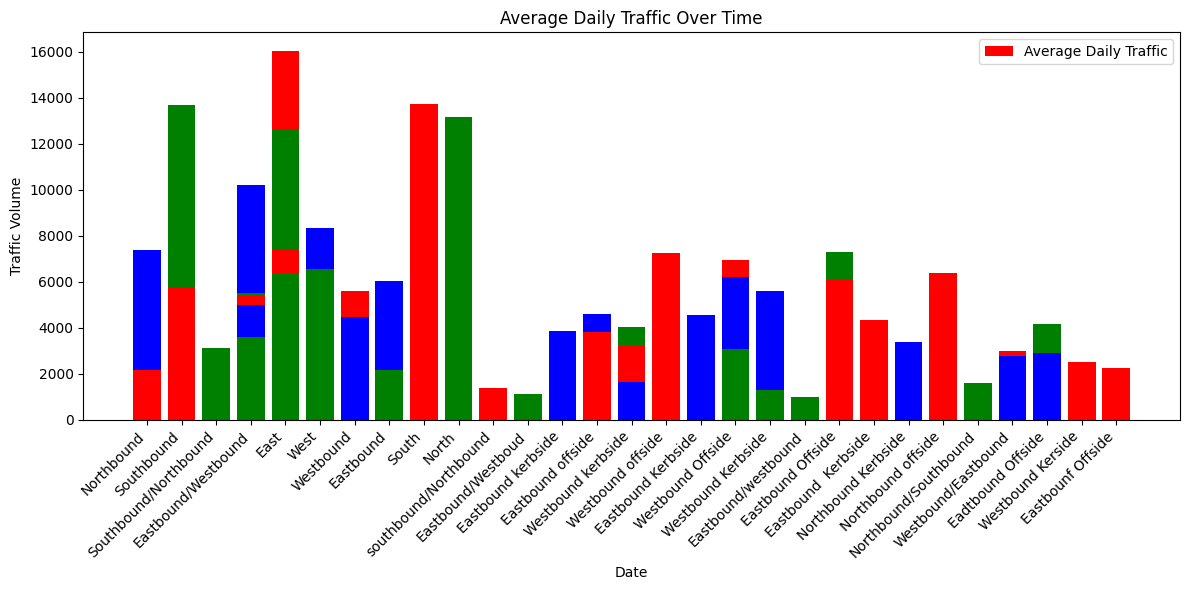

In [78]:
# Plot the the Average daily traffic(ADT) and their Direction bound

plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue'] # List of colors for the bar 
plt.bar(df['Direction Bound'], df['ADT'], color=colors, label='Average Daily Traffic')
#plt.plot(df['Street Location'], df['ADT'], label='Average Monthly Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
# Make the x-axis label more visible
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.tight_layout() # Adjust layout to make room for the rotated labels
plt.show()

In [84]:
# Display Average daily trafic (ADT) on a map

# Create a base map centered on the average latitude and longitude of the data
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

# Initialize the map with a theme and proper attribution
traffic_map = folium.Map(
    location=map_center, 
    zoom_start=14, 
    tiles='Stamen Terrain', 
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
)

# Add markers to the map
for i, row in df.iterrows():
    # Marker for each traffic point
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"'ADT': {row['ADT']}" if 'ADT' in row and pd.notna(row['ADT']) else "ADT Unavailable",
        icon=folium.Icon(icon="info-sign", color="red")
    ).add_to(traffic_map)

# Add a base map layer 
folium.TileLayer('OpenStreetMap').add_to(traffic_map)

# Display the map inline if in a Jupyter Notebook
traffic_map

In [82]:
# Select relevant column needed to build the model
df=df[['Start Date', 'End Date', 'ADT', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'Street Location', 'Direction Bound', 'Longitude', 'Latitude']]
df.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273


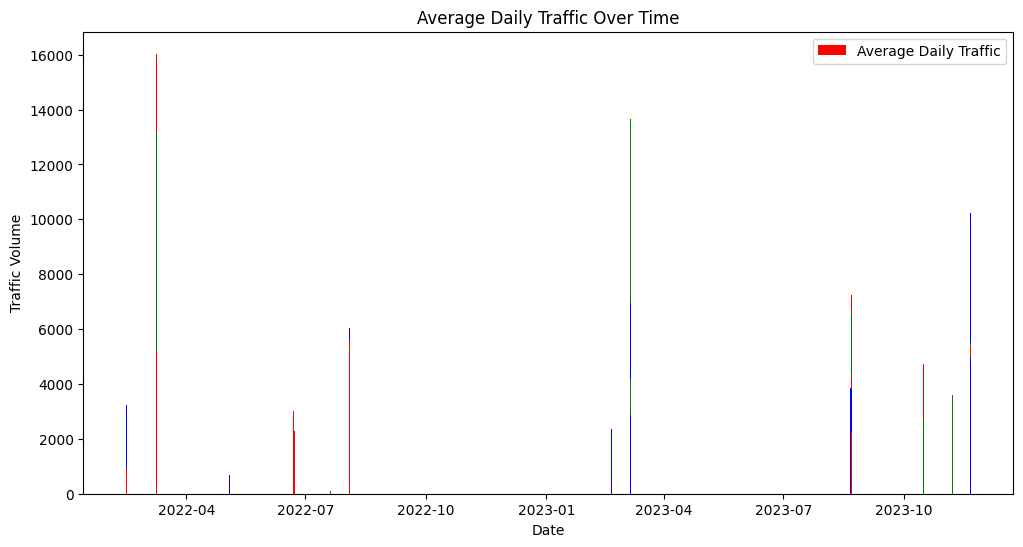

In [85]:
# Visualize the information (i.e. plot average daily traffic over time)
plt.figure(figsize=(12,6))
colors=['red', 'green', 'blue']
plt.bar(df['Start Date'], df['ADT'], color=colors, label='Average Daily Traffic')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Average Daily Traffic Over Time')
plt.legend()
plt.show()

In [86]:
# Create additional time based features
df['Year'] = df['Start Date'].dt.year
df['Month'] =df['Start Date'].dt.month
df['Day']=df['Start Date'].dt.day
df['DayOfWeek']=df['Start Date'].dt.dayofweek
df.head()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
0,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
1,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
2,2022-03-09,2022-03-16,2775,257,245,12.2,50,40.32,1.038,Hampden Road,Northbound,115.813439,-31.972883,2022,3,9,2
3,2022-03-09,2022-03-16,2426,208,252,14.4,50,37.98,0.461,Hampden Road,Southbound,115.813439,-31.972883,2022,3,9,2
4,2023-02-20,2023-02-27,81,7,9,0.0,50,23.04,0.000,Altair Lane,Southbound/Northbound,115.813988,-31.972273,2023,2,20,0


In [87]:
# In a forecast model, we don't use X_train, y_train, X_test, y_test (which is applicable in a supervised ML model), we only use train data set and test dataset.
# The train dataset should include the supposed X_train and y_train as one datatset, while the test dataset should include the supposed X_test and y_test as one dataset
series= df[['Year', 'Month', 'Day', 'DayOfWeek', 'AM Peak 8 To 9', 'PM Peak 5 To 6', 'Percent Heavy Vehicles', 'Speed Limit', 'Percentile 85th', 'Percent Exceed Speed Limit', 'ADT','Street Location', 'Direction Bound', 'Longitude', 'Latitude']]
series.head()

,Year,Month,Day,DayOfWeek,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,ADT,Street Location,Direction Bound,Longitude,Latitude
0,2022,3,9,2,257,245,12.2,50,40.32,1.038,2775,Hampden Road,Northbound,115.813439,-31.972883
1,2022,3,9,2,208,252,14.4,50,37.98,0.461,2426,Hampden Road,Southbound,115.813439,-31.972883
2,2022,3,9,2,257,245,12.2,50,40.32,1.038,2775,Hampden Road,Northbound,115.813439,-31.972883
3,2022,3,9,2,208,252,14.4,50,37.98,0.461,2426,Hampden Road,Southbound,115.813439,-31.972883
4,2023,2,20,0,7,9,0.0,50,23.04,0.000,81,Altair Lane,Southbound/Northbound,115.813988,-31.972273


In [88]:
# The model to experiment with, will be the ARIMA model
# ARIMA uses p, d, q values
# p -> The number of lag observation included in the model (autoregressive part)
# d -> The number of times that the raw observations are differenced (integrated part)
# q -> The size of the moving average window (moving average part)

In [89]:
# d will be determined by plotting the data and checking for stationarity. If not stationary, the data will be differenced to make it stationary

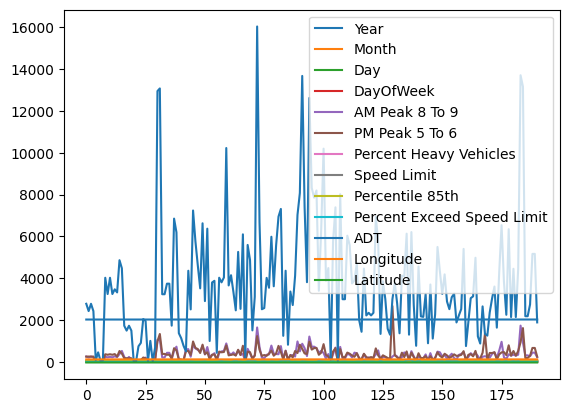

In [90]:
# Plotting the data
series.plot()
plt.show()

In [91]:
# Convert to a one-dimensional array i.e. select one column out of the numerous columns, to analyze. Usually the output/result/dependent_value/y value, should be used, because it would be employed for the forecasting
series_id = series['ADT']

# Check for stationarity
result = adfuller(series_id)
print('ADF Statistic:', result)
print('p-value:', result)

ADF Statistic: (np.float64(-9.870690686757465), np.float64(4.002354723408076e-17), 0, 190, {'1%': np.float64(-3.4652439354133255), '5%': np.float64(-2.8768752281673717), '10%': np.float64(-2.574944653739612)}, np.float64(3274.924080705672))
p-value: (np.float64(-9.870690686757465), np.float64(4.002354723408076e-17), 0, 190, {'1%': np.float64(-3.4652439354133255), '5%': np.float64(-2.8768752281673717), '10%': np.float64(-2.574944653739612)}, np.float64(3274.924080705672))


ADF (AUGMENTED Dickey-Fuller) Test Results:


ADF Statistics: -9.870690686757465

p-value = 4.002354723408076e-17

Critical Values:

1%: -3.4652439354133255

5%: -2.8768752281673717

10%: -2.574944653739612

Since the ADF Statistics is much lower than the Critical Values and the p-value is less than 0.05, we reject the null hypothesis of the ADF test.
The null hypothesis test states that the series has a unit root(i.e., it is not stationary).
Rejecting the null hypothesis means the series/data does not have a unit root and is therefore stationary

In summary, since the null hypothesis (not-stationary) was rejected by the ADF Test Result, it means that series_id is stationary.

However, if the null hypothesis was accepted (ie, if the series_id or data is not-stationary), we difference with the code below to make it stationary:

series_diff = series_id.diff().dropna()

Finally (d) = 0 while building the ARIMA model, because the series_id was already stationary and no difffrencing was applied. If it wasn't stationary, the number of diffrencing applied using the 'series_diff' formular would have been applied, and d will be equal to the number of times the 'series_diff' was applied. For eg d=1 or 2 or 3, depending how many times 'series_diff' was applied.

NB: If not stationary, the stationarity check would need to be applied for each 'series_diff' check, to determine if the data has become stationary.

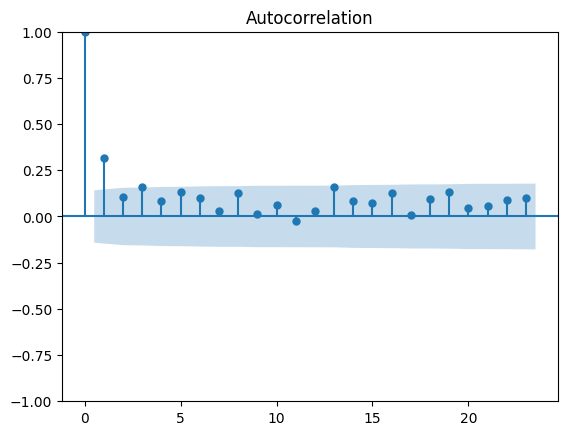

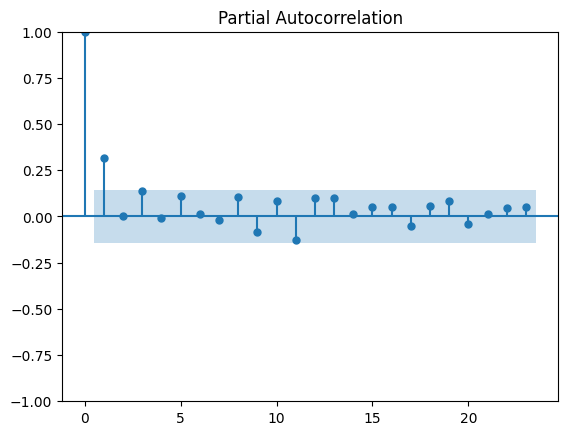

In [92]:
# Determine (p) and (q) using the PACF  and ACF  by ploting that
plot_acf(series_id)
plot_pacf(series_id)
plt.show()




1. Determining P from the PACF (Partial Autocorrelation function) plot:

PACF shows a large significant spike at lag 1.
After lag 1, the spikes seem to fall within the confidence interval (the shaded region), meaning they are statistically insignificant.
Thus, the P value can be set to 1, as the only significant partial autocorrelation occurs at lag 1.

2. Determining q from the ACF (Autocorrelation Function) plot:

In the ACF plot (from the first image), there is a significant spike at lag 1, and all other lags fall within the confidence interval (the shaded region/statistically insignificant).
Therefore, the q value should also be 1, based on the significant autocorrelation at lag 1 in the ACF plot.

IN CONCLUSION:

The values of the p,d,q arima models are:

P (from PACF) = 1 (since there's one significant spike at lag 1).

Q (from ACF) = 1 (since there's one significant spike at lag 1).

d (from differencing) =0 (since d is was stationary, i.e, no difference was applied)

Thus, the suggested model from these plots is ARIMA(1, 0, 1)



In [93]:
# Splitting the data into train and test
train_size = int(len(series_id)*0.8) # 80% of data for training
train, test = series_id[:train_size], series_id[train_size:] # train is all the dataset in the train_size, i.e the 80%. while the test is the data outside the train_size, i.e 20%

print('Training set size:', len(train))
print('Testing set size:', len(test))


Training set size: 152
Testing set size: 39


In [94]:
# Build the model using the already determined P, D, Q values
model = ARIMA(train, order=(1,0,1)) # ARIMA(p,d,q)
ARIMA_model = model.fit()

In [95]:
# Print model summary
print(ARIMA_model.summary())


                               SARIMAX Results                                
Dep. Variable:                    ADT   No. Observations:                  152
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1417.263
Date:                Mon, 14 Oct 2024   AIC                           2842.526
Time:                        12:46:28   BIC                           2854.622
Sample:                             0   HQIC                          2847.440
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3843.0657    563.618      6.819      0.000    2738.394    4947.737
ar.L1          0.7374      0.124      5.969      0.000       0.495       0.979
ma.L1         -0.5088      0.147     -3.463      0.0

In [96]:
# Make predictions with the unseen test data
predictions = ARIMA_model.forecast(steps=len(test))

In [97]:
# Calculate performance metrics
mae = mean_absolute_error(test, predictions)     # mean absolute error
mse = mean_squared_error(test, predictions)      # mean squared error
rmse = mse**0.5                                  # root mean squared error
mape = (abs((test-predictions)/test).mean())*100 # mean absolute percentage error

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 1911.685049401577
MSE: 7410456.3571960945
RMSE: 2722.2153399751633
MAPE: 77.94275658522047%


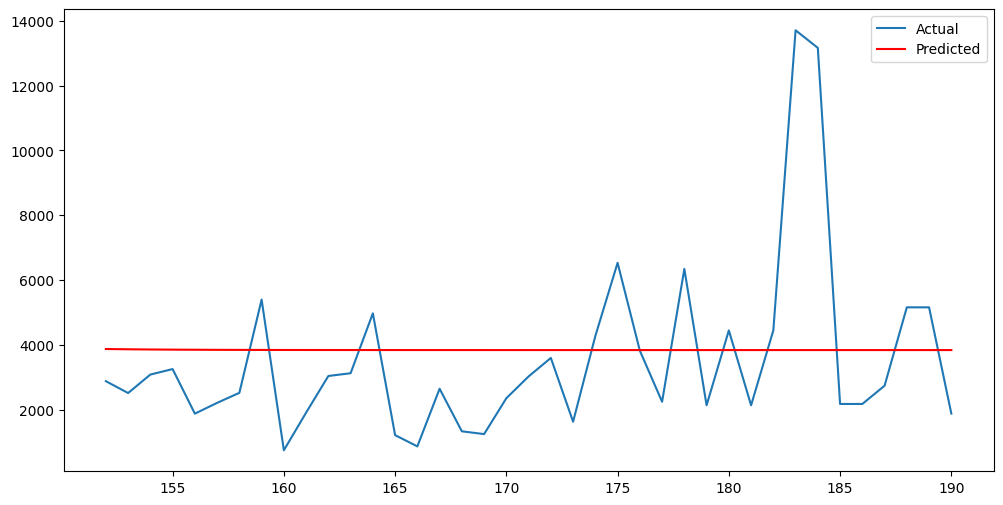

In [98]:
# Plot actual data against the predictions
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [99]:
# Checks that df still contains its original column
df.tail()

,Start Date,End Date,ADT,AM Peak 8 To 9,PM Peak 5 To 6,Percent Heavy Vehicles,Speed Limit,Percentile 85th,Percent Exceed Speed Limit,Street Location,Direction Bound,Longitude,Latitude,Year,Month,Day,DayOfWeek
186,2022-03-09,2022-03-16,2181,307,184,4.3,50,47.17,5.162,Hay Street,Northbound,115.879383,-31.961777,2022,3,9,2
187,2023-10-16,2023-10-23,2744,268,290,0.5,50,40.32,0.651,Royal street,Eastbound/Westbound,115.879520,-31.953141,2023,10,16,0
188,2022-03-09,2022-03-16,5161,438,663,1.6,50,46.98,4.727,Hay Street,Southbound,115.879956,-31.961537,2022,3,9,2
189,2022-03-09,2022-03-16,5161,438,663,1.6,50,46.98,4.727,Hay Street,Southbound,115.879956,-31.961537,2022,3,9,2
190,2023-10-16,2023-10-23,1885,220,247,2.4,50,46.98,7.600,Tragalgar Road,Southbound/Northbound,115.880141,-31.954494,2023,10,16,0


In [100]:
# Forecast traffic for the next 20 periods
forecast =ARIMA_model.forecast(steps=20) # Setting up the model to predict next 20 times
forecast_dates = pd.date_range(start=df['Start Date'].iloc[-1]+pd.Timedelta(days=1),periods=20, freq='D') #['Start Date'].iloc[-1], sets the starting date for the forecast, after the last date in 'Start Date' column of df
                                                                                                          # periods =20 means the prediction should be in range 20 dates
                                                                                                          # freq='D' set the frequency of the dates to daily




In [102]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'forecast_ADT': forecast}) # 'forecast_ADT: forecast average daily temperature
forecast_df.set_index('Date', inplace=True)
forecast_df.head()


,forecast_ADT
Date,
2023-10-17,3875.972208
2023-10-18,3867.330023
2023-10-19,3860.957523
2023-10-20,3856.258623
2023-10-21,3852.793789


In [103]:
# Check the columns in forecast_df
forecast_df.columns

Index(['forecast_ADT'], dtype='object')

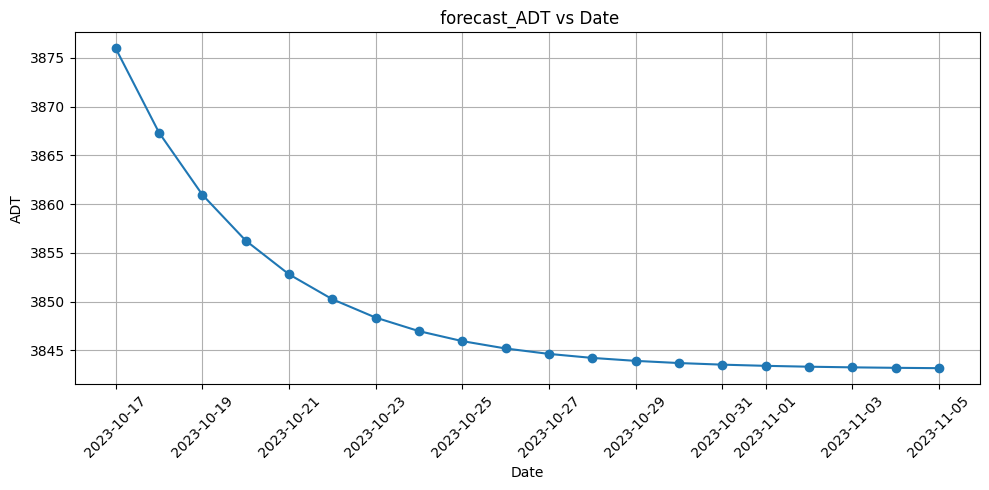

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df.index, forecast_df['forecast_ADT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('ADT')
plt.title(' forecast_ADT vs Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# Conclusion:
# From the visualized traffic forecast result, there was more traffic on 10/17 2023. 
# Nb: This was a 2023 data, utilizing an updated year data like 2024 or 2025, will probably predict traffic information for future dates 